**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

* NOMBRE: Marcos Eduardo García Ortiz
* MATRÍCULA: A01276213
* NOMBRE: Renzo Antonio Zagni Vestrini
* MATRÍCULA: A01795457
* NOMBRE: Jorge Barón
* MATRÍCULA: A01422588
* NOMBRE: Dalia Isabel López Tapia
* MATRÍCULA: A01245026

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)

In [66]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [67]:
data_df.set_index('id', inplace=True)

In [68]:
import warnings
warnings.filterwarnings('ignore')



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [69]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [70]:
# Variables numericas
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [71]:
# Variables numericas
# Mediana
data_df.median()

radius_mean                 13.370000
texture_mean                18.840000
perimeter_mean              86.240000
area_mean                  551.100000
smoothness_mean              0.095870
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033500
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.108000
perimeter_se                 2.287000
area_se                     24.530000
smoothness_se                0.006380
compactness_se               0.020450
concavity_se                 0.025890
concave points_se            0.010930
symmetry_se                  0.018730
fractal_dimension_se         0.003187
radius_worst                14.970000
texture_worst               25.410000
perimeter_worst             97.660000
area_worst                 686.500000
smoothness_worst             0.131300
compactness_worst            0.211900
concavity_wo

In [72]:
# Variables numericas
# Modo
# Iteramos para generar un reporte mas legible ya que existen variables con
# multiple modos
for colname in data_df.columns:
  print("Columna: " + colname.capitalize())
  print("-----------------------------")
  print(data_df[colname].mode())
  print("")

Columna: Diagnosis
-----------------------------
0    B
Name: diagnosis, dtype: object

Columna: Radius_mean
-----------------------------
0    12.34
Name: radius_mean, dtype: float64

Columna: Texture_mean
-----------------------------
0    14.93
1    15.70
2    16.84
3    16.85
4    17.46
5    18.22
6    18.90
7    19.83
8    20.52
Name: texture_mean, dtype: float64

Columna: Perimeter_mean
-----------------------------
0     82.61
1     87.76
2    134.70
Name: perimeter_mean, dtype: float64

Columna: Area_mean
-----------------------------
0    512.2
Name: area_mean, dtype: float64

Columna: Smoothness_mean
-----------------------------
0    0.1007
Name: smoothness_mean, dtype: float64

Columna: Compactness_mean
-----------------------------
0    0.1147
1    0.1206
Name: compactness_mean, dtype: float64

Columna: Concavity_mean
-----------------------------
0    0.0
Name: concavity_mean, dtype: float64

Columna: Concave points_mean
-----------------------------
0    0.0
Name: concav

In [73]:
# Variables categoricas
data_df.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [74]:
data_df.nunique()
# La columna diagnosis es la unica variable categorica del data frame

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

1c) Búsqueda de valores faltantes.

In [75]:
data_df.isna().sum()
# Ninguna columna tienes valores faltantes

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

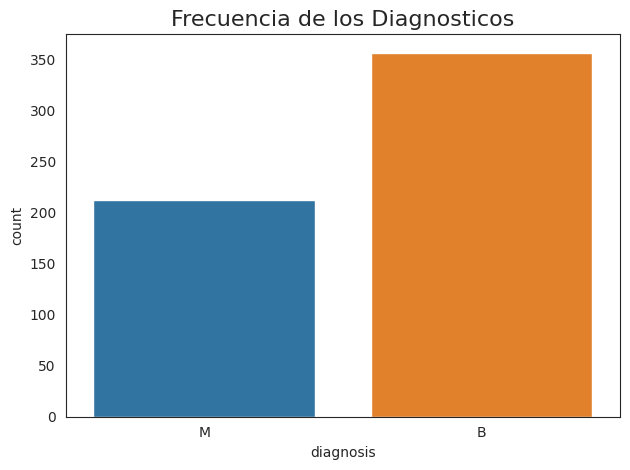

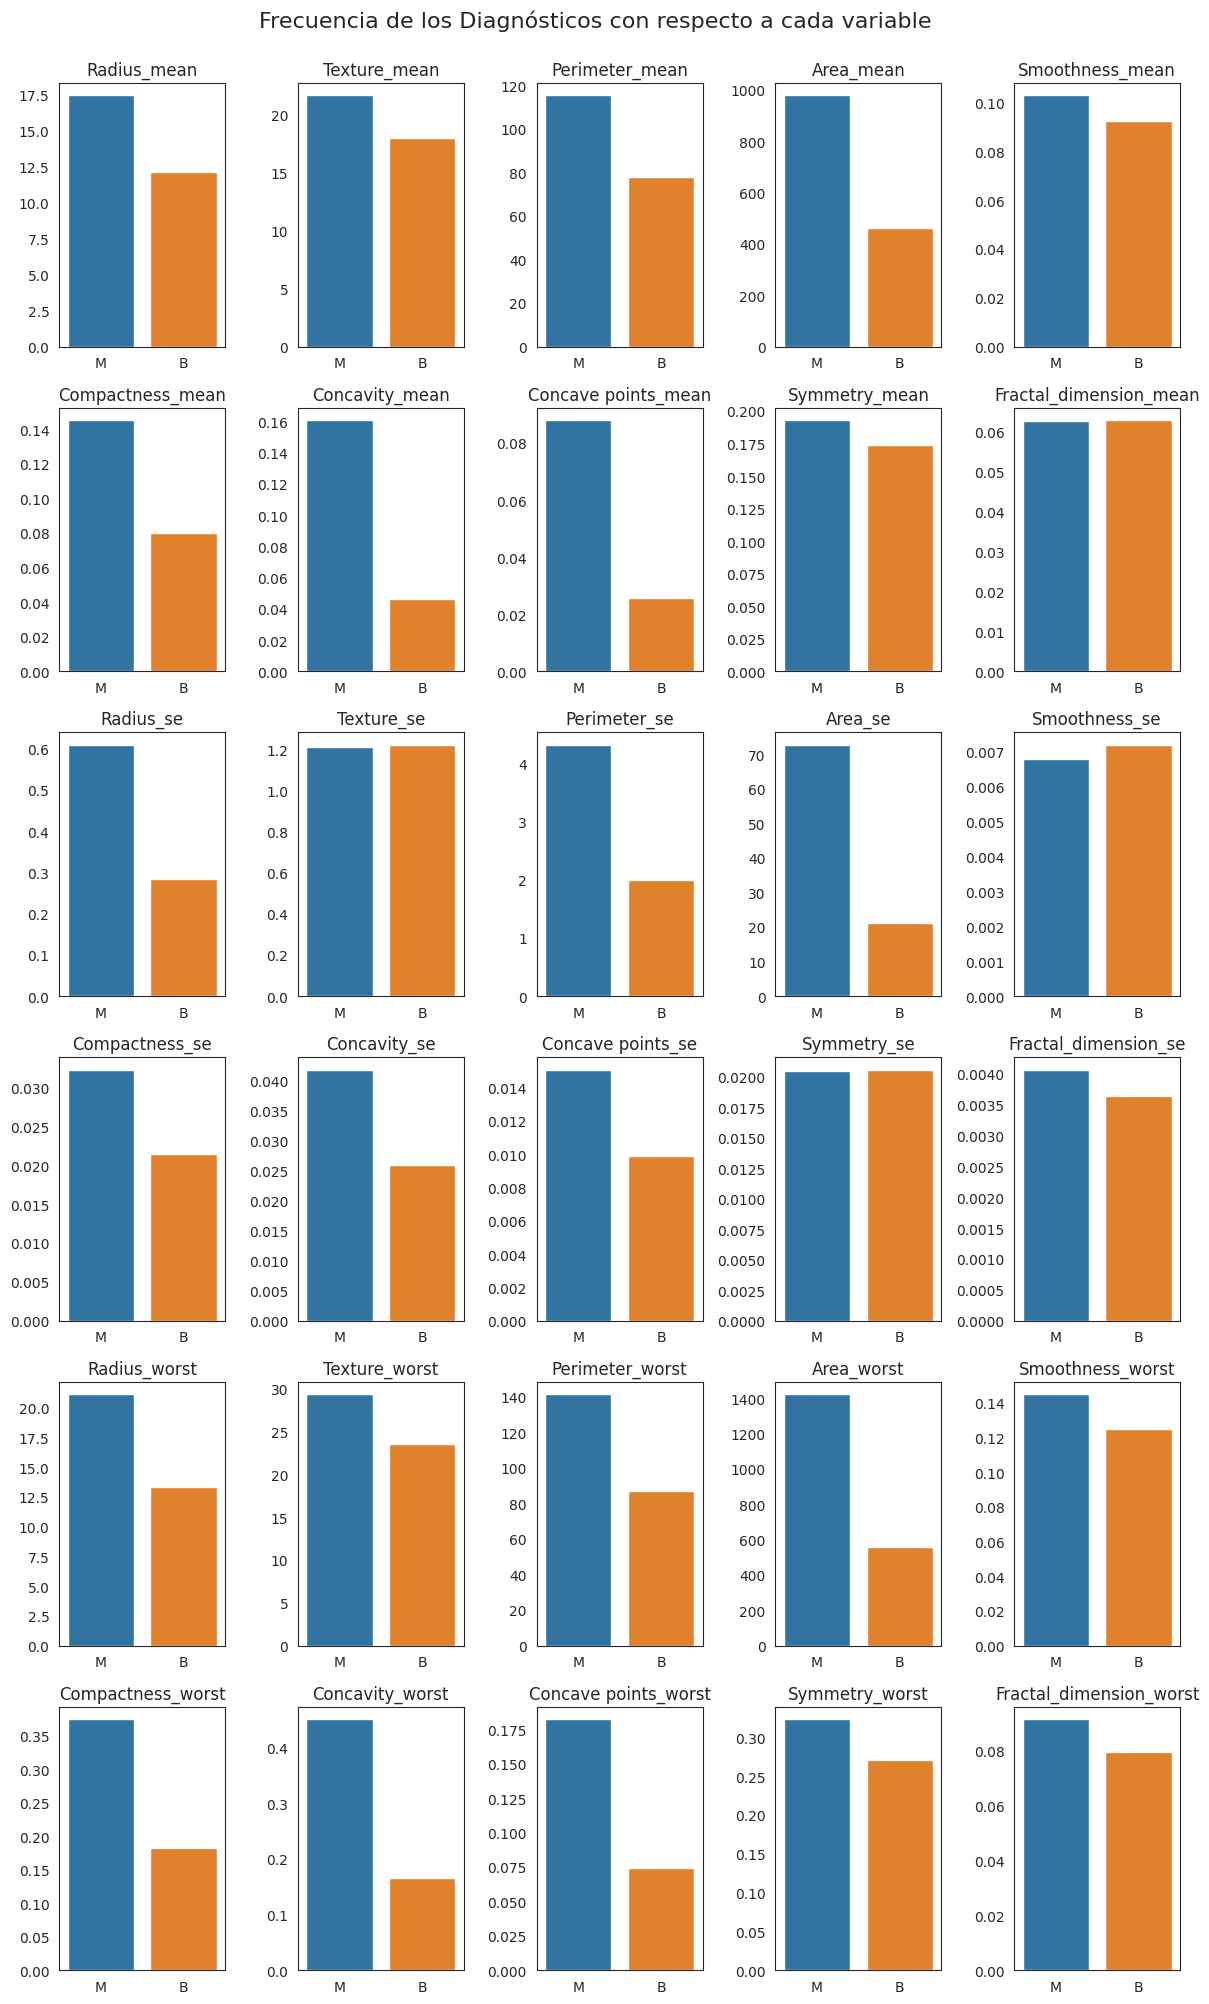

In [76]:
# Diagrama de frecuencia de los Diagnosticos
plt.title("Frecuencia de los Diagnosticos", fontsize=16, y=1)
cp = sns.countplot(data=data_df, x = 'diagnosis')
plt.tight_layout()
# Diagramas de frecuencia de los Diagnostivos vs cada una de las variables
fig, axes = plt.subplots(figsize=(12,20))
fig.suptitle("Frecuencia de los Diagnósticos con respecto a cada variable", fontsize=16, y=1)
col_cnt = 1
for colname in data_df.columns:
  if colname != 'diagnosis':
    ax = plt.subplot(6,5, col_cnt)
    ax.set_title(colname.capitalize())
    bp = sns.barplot(data=data_df, x="diagnosis", y=colname, ci=None )
    # Decluttering
    bp.set(xlabel=None, ylabel=None)
    col_cnt += 1
plt.tight_layout()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

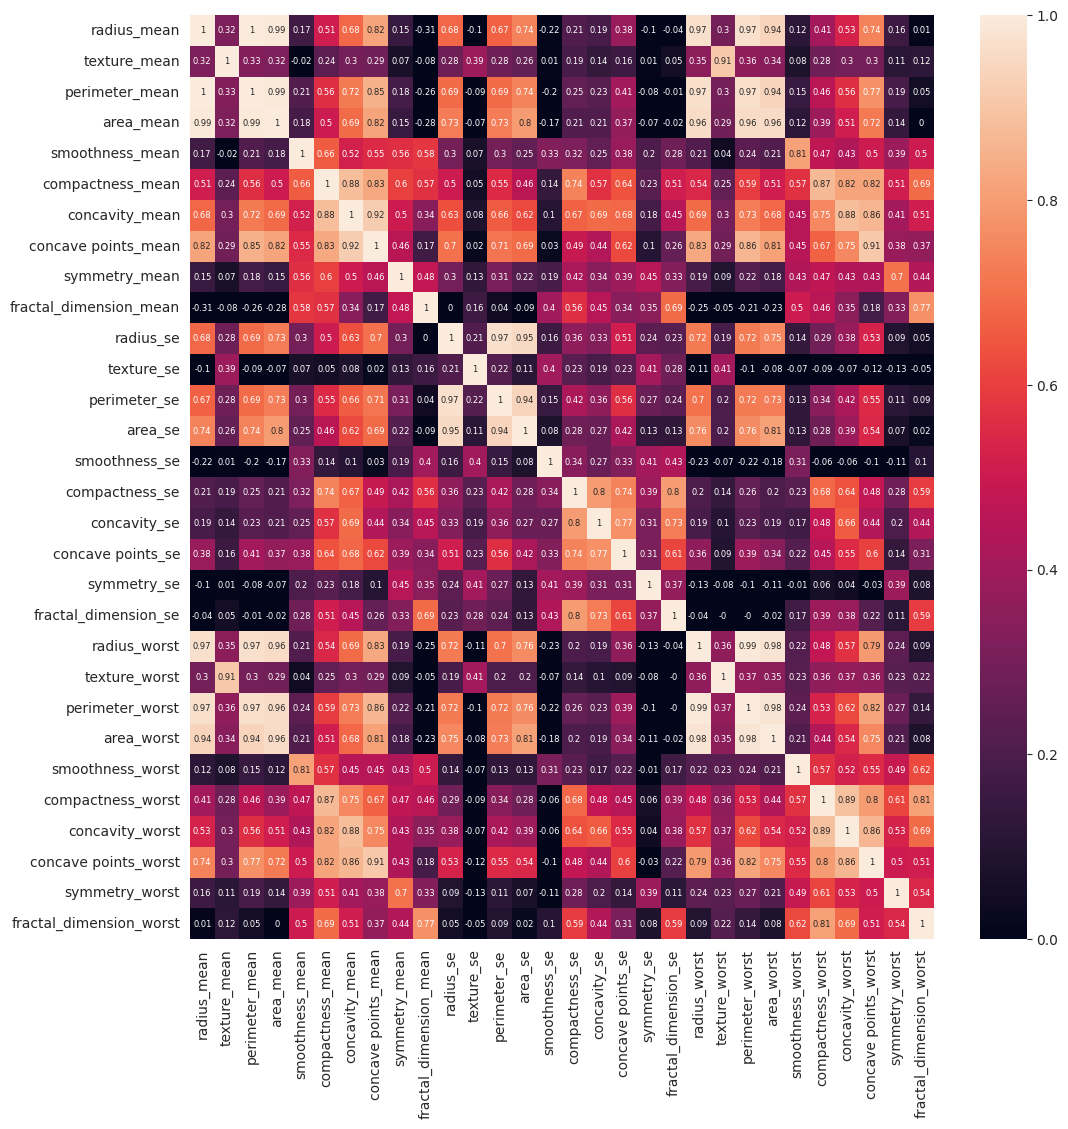

In [77]:
plt.figure(figsize = (12, 12))
sns.heatmap(round(data_df.corr(),2), annot = True, vmin=0, vmax=1, annot_kws={"size":6})
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

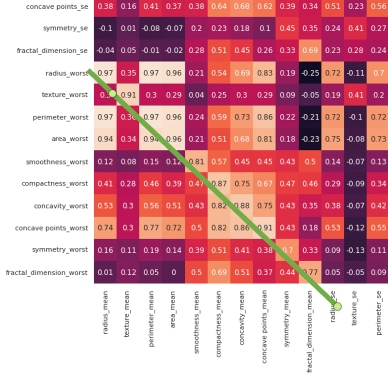

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [78]:
data_df.drop(data_df.loc[:,data_df.columns.str.endswith('_worst')], axis=1, inplace=True)

In [79]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-nul

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




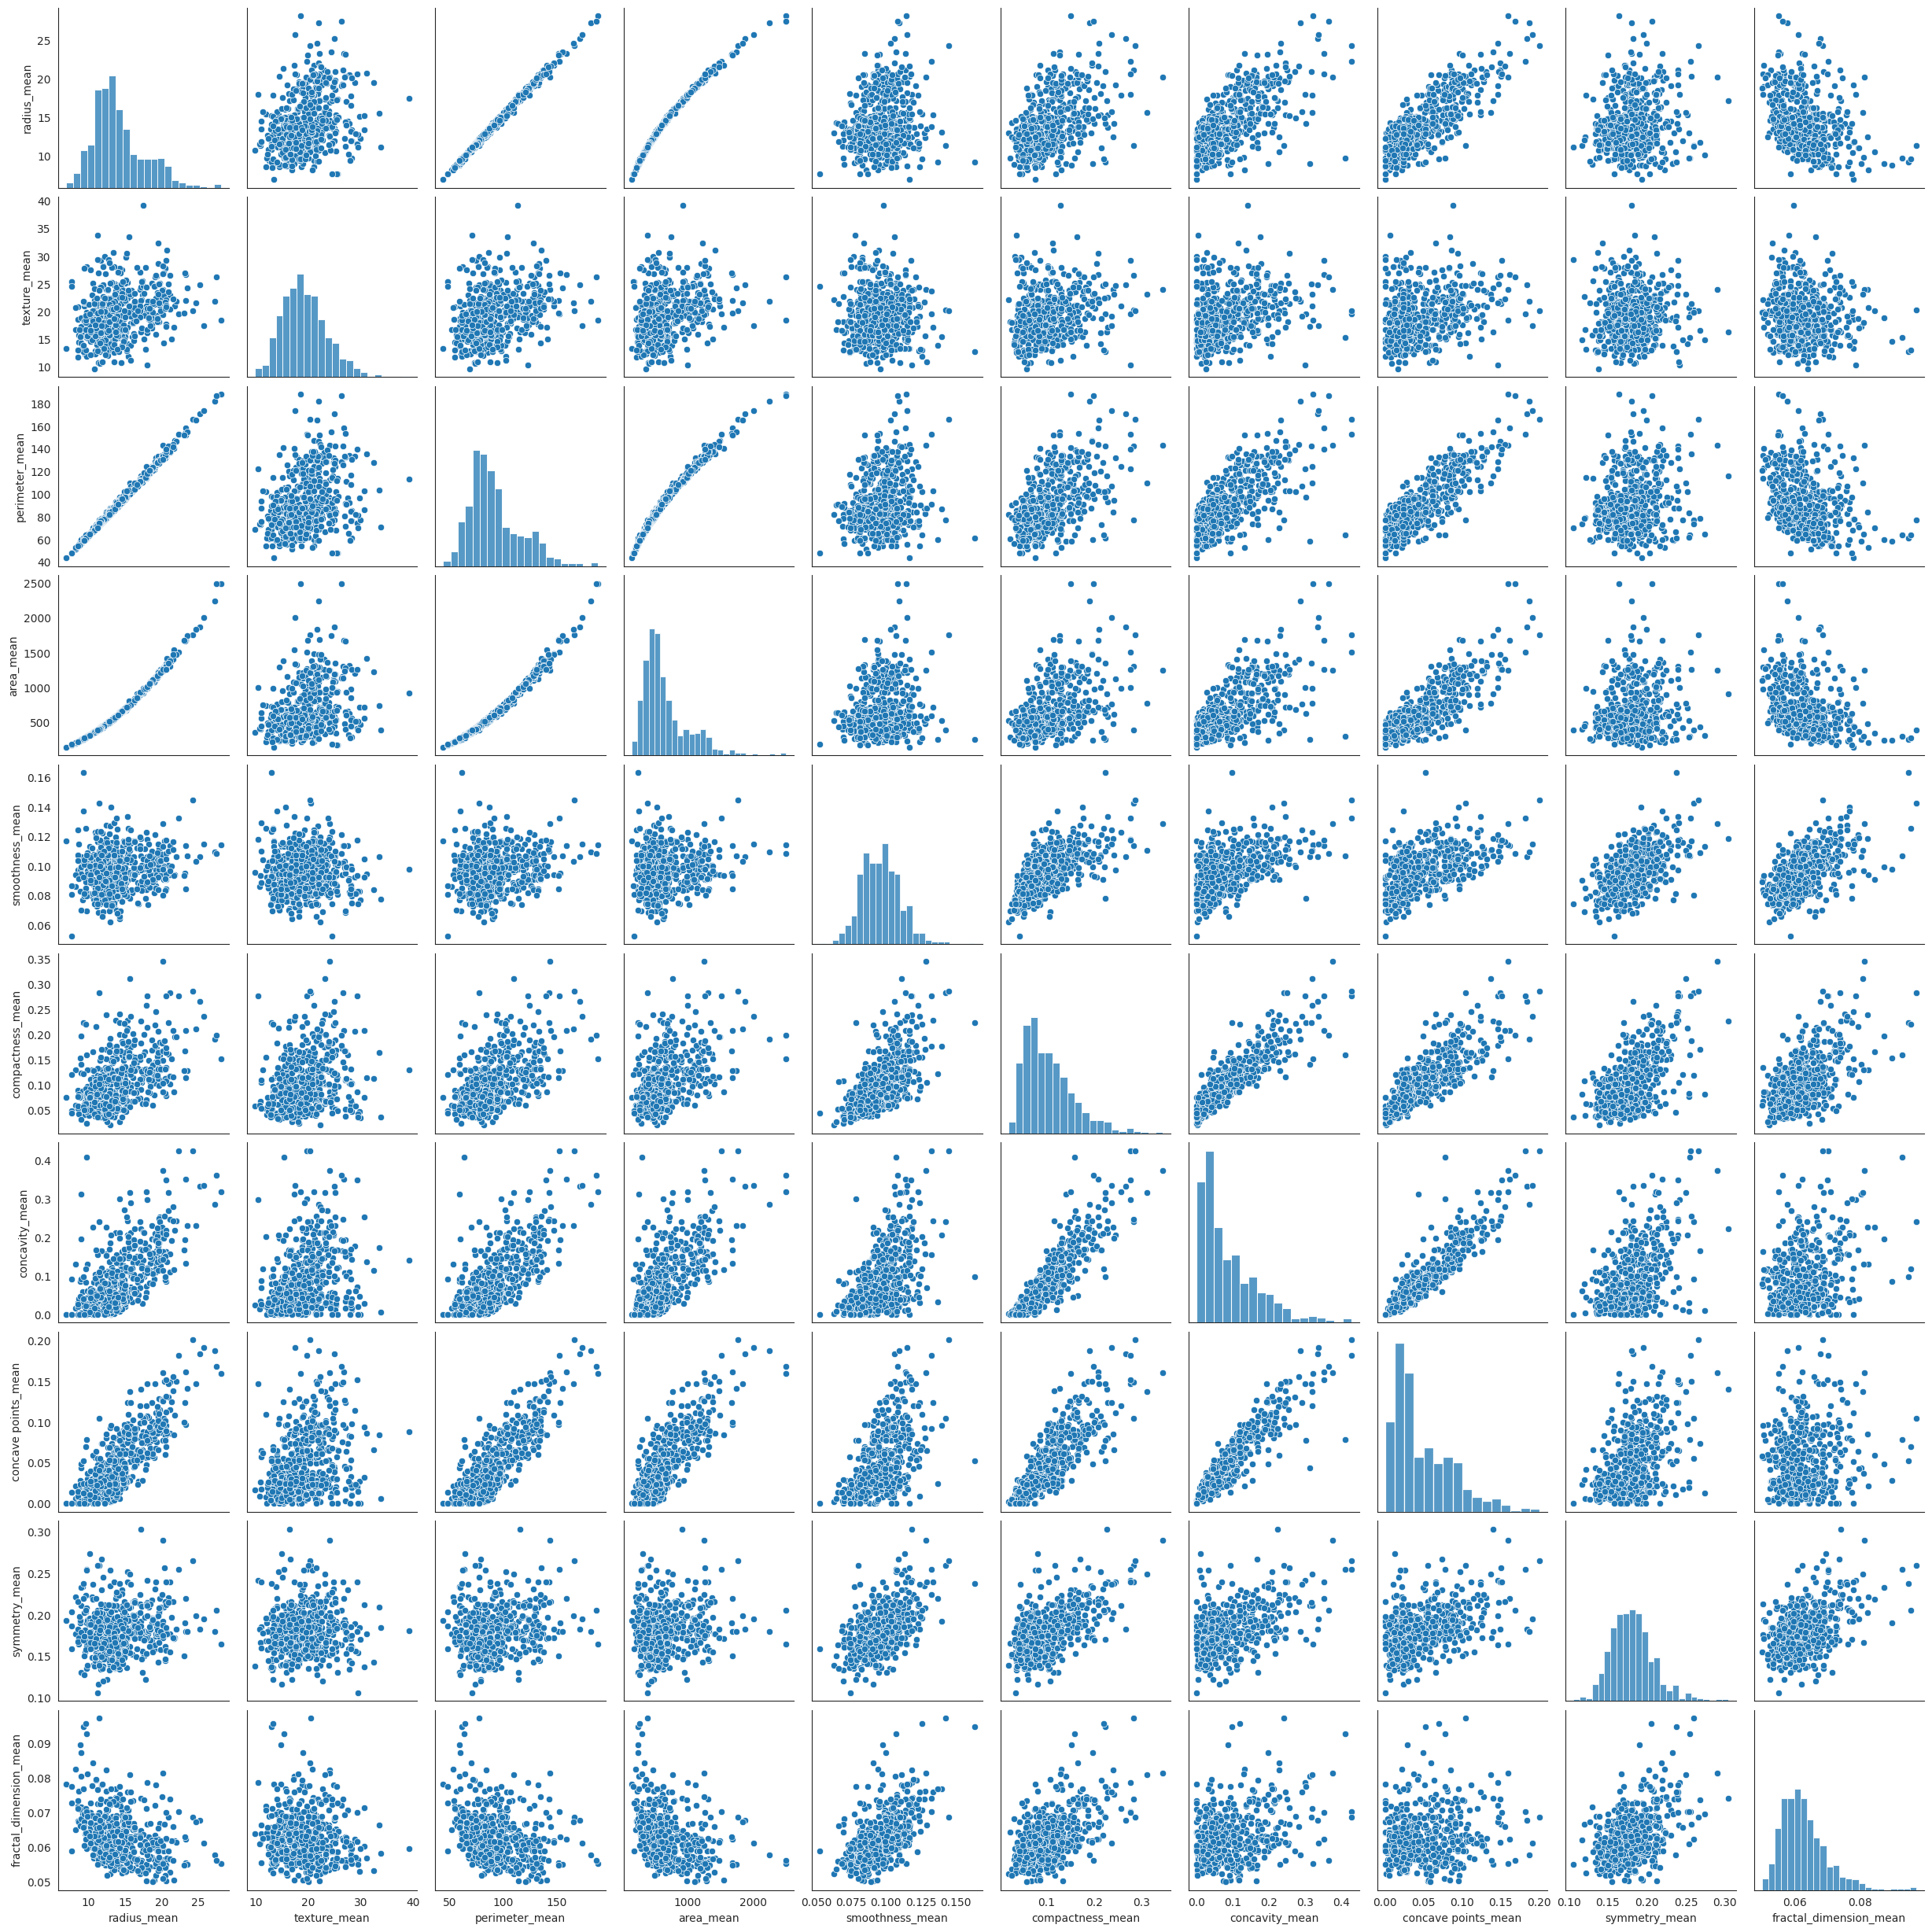

In [80]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


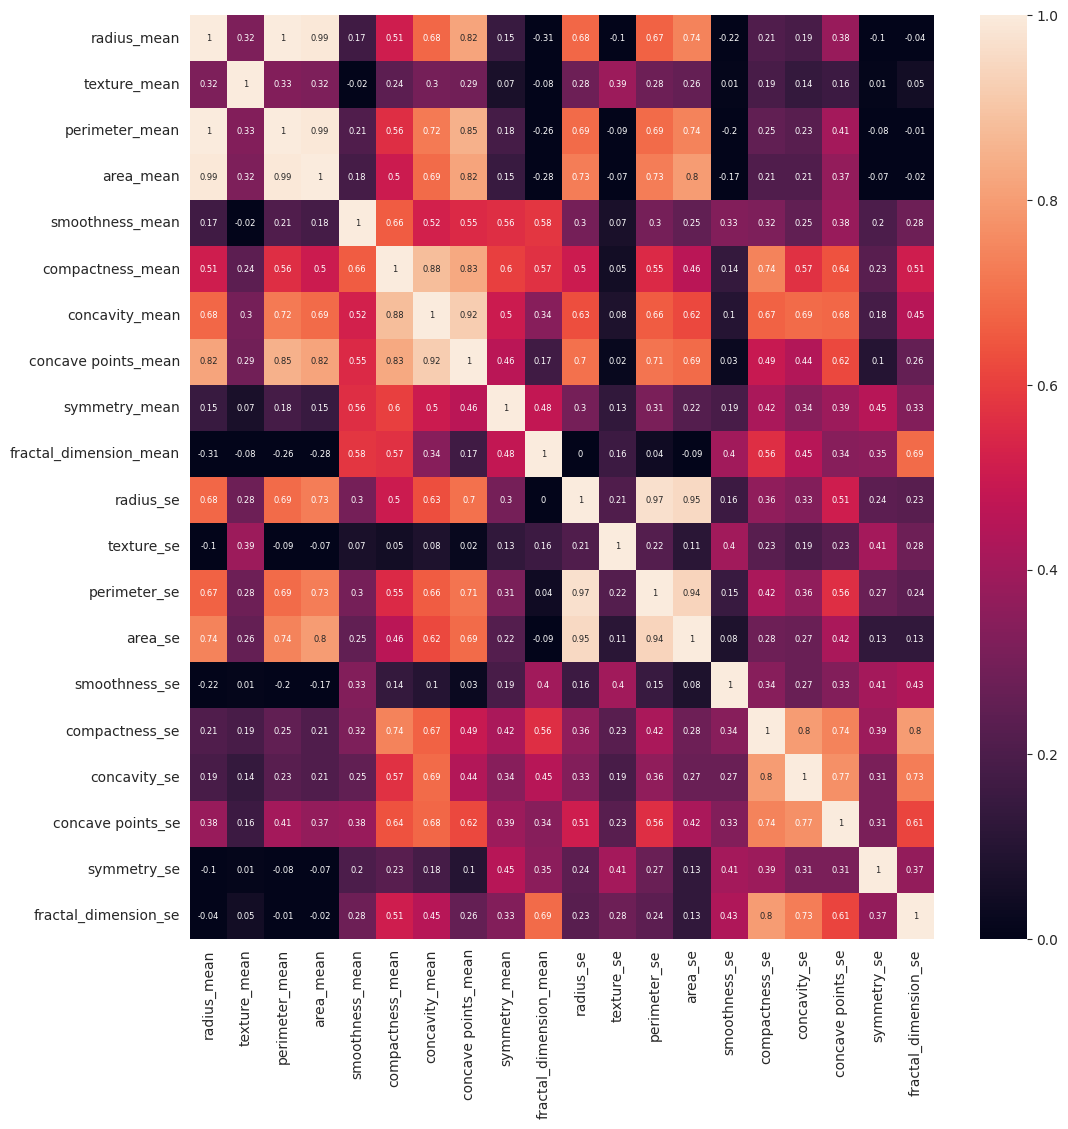

In [81]:
plt.figure(figsize = (12, 12))
sns.heatmap(round(data_df.corr(),2), annot = True, vmin=0, vmax=1, annot_kws={"size":6})
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [82]:
# Guardamos esta lista para se utilizada posteriormente
drop_cols = ['perimeter_mean',
             'perimeter_se',
             'area_mean',
             'area_se',
             'concavity_mean',
             'concave points_mean',
             'concavity_se',
             'concave points_se'
             ]
data_df.drop(drop_cols, axis=1, inplace=True)

In [83]:
data_df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

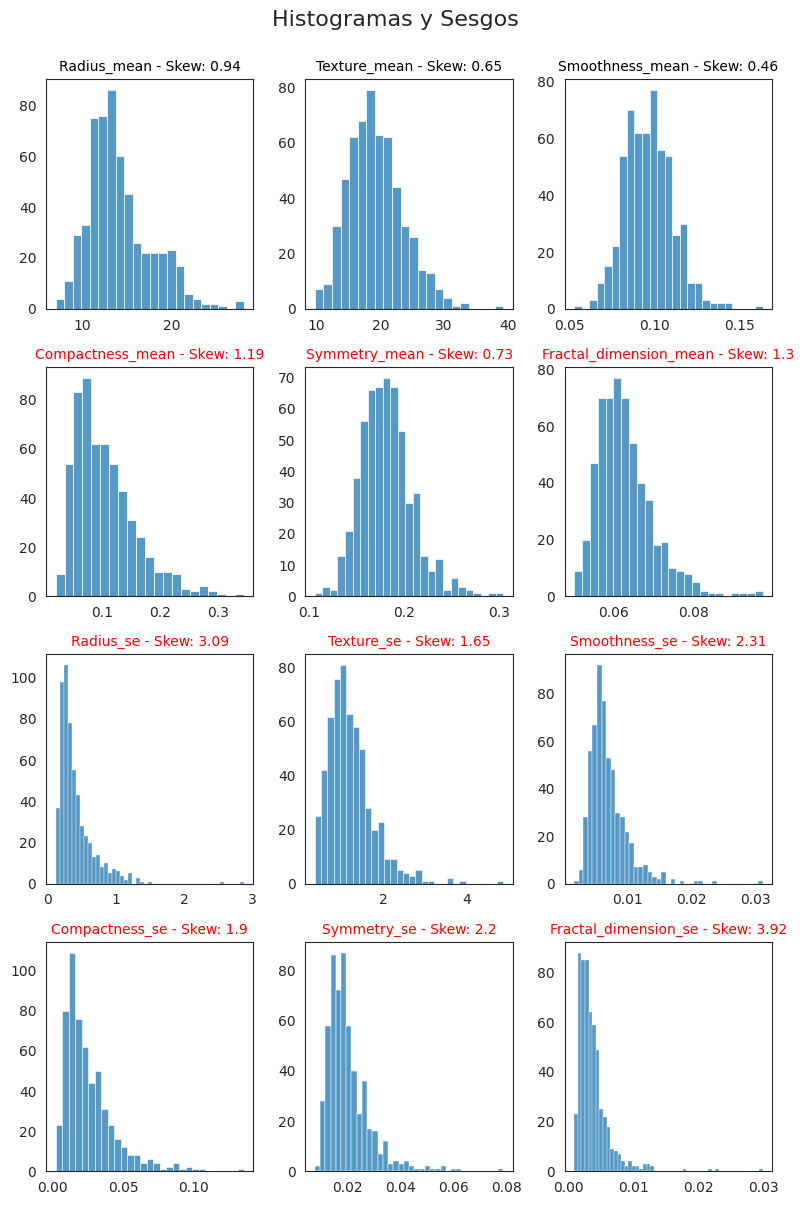

In [84]:
fig, axes = plt.subplots(figsize=(8,12))
fig.suptitle("Histogramas y Sesgos", fontsize=16, y=1)
col_cnt = 1
skew_cols = []
title_color = 'black'
for colname in data_df.select_dtypes(include='number'):
  sk = data_df[colname].skew()
  if sk > 1:
    skew_cols.append(colname)
    title_color = 'red'
  ax = plt.subplot(4,3, col_cnt)
  ax.set_title(colname.capitalize() + " - Skew: " + str(round(sk,2)), color=title_color, size=10)
  bp = sns.histplot(data_df[colname])
  # Decluttering
  bp.set(xlabel=None, ylabel=None)
  col_cnt += 1
plt.tight_layout()

In [85]:
print("Variables con Sesgo > 1")
print(skew_cols)

Variables con Sesgo > 1
['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


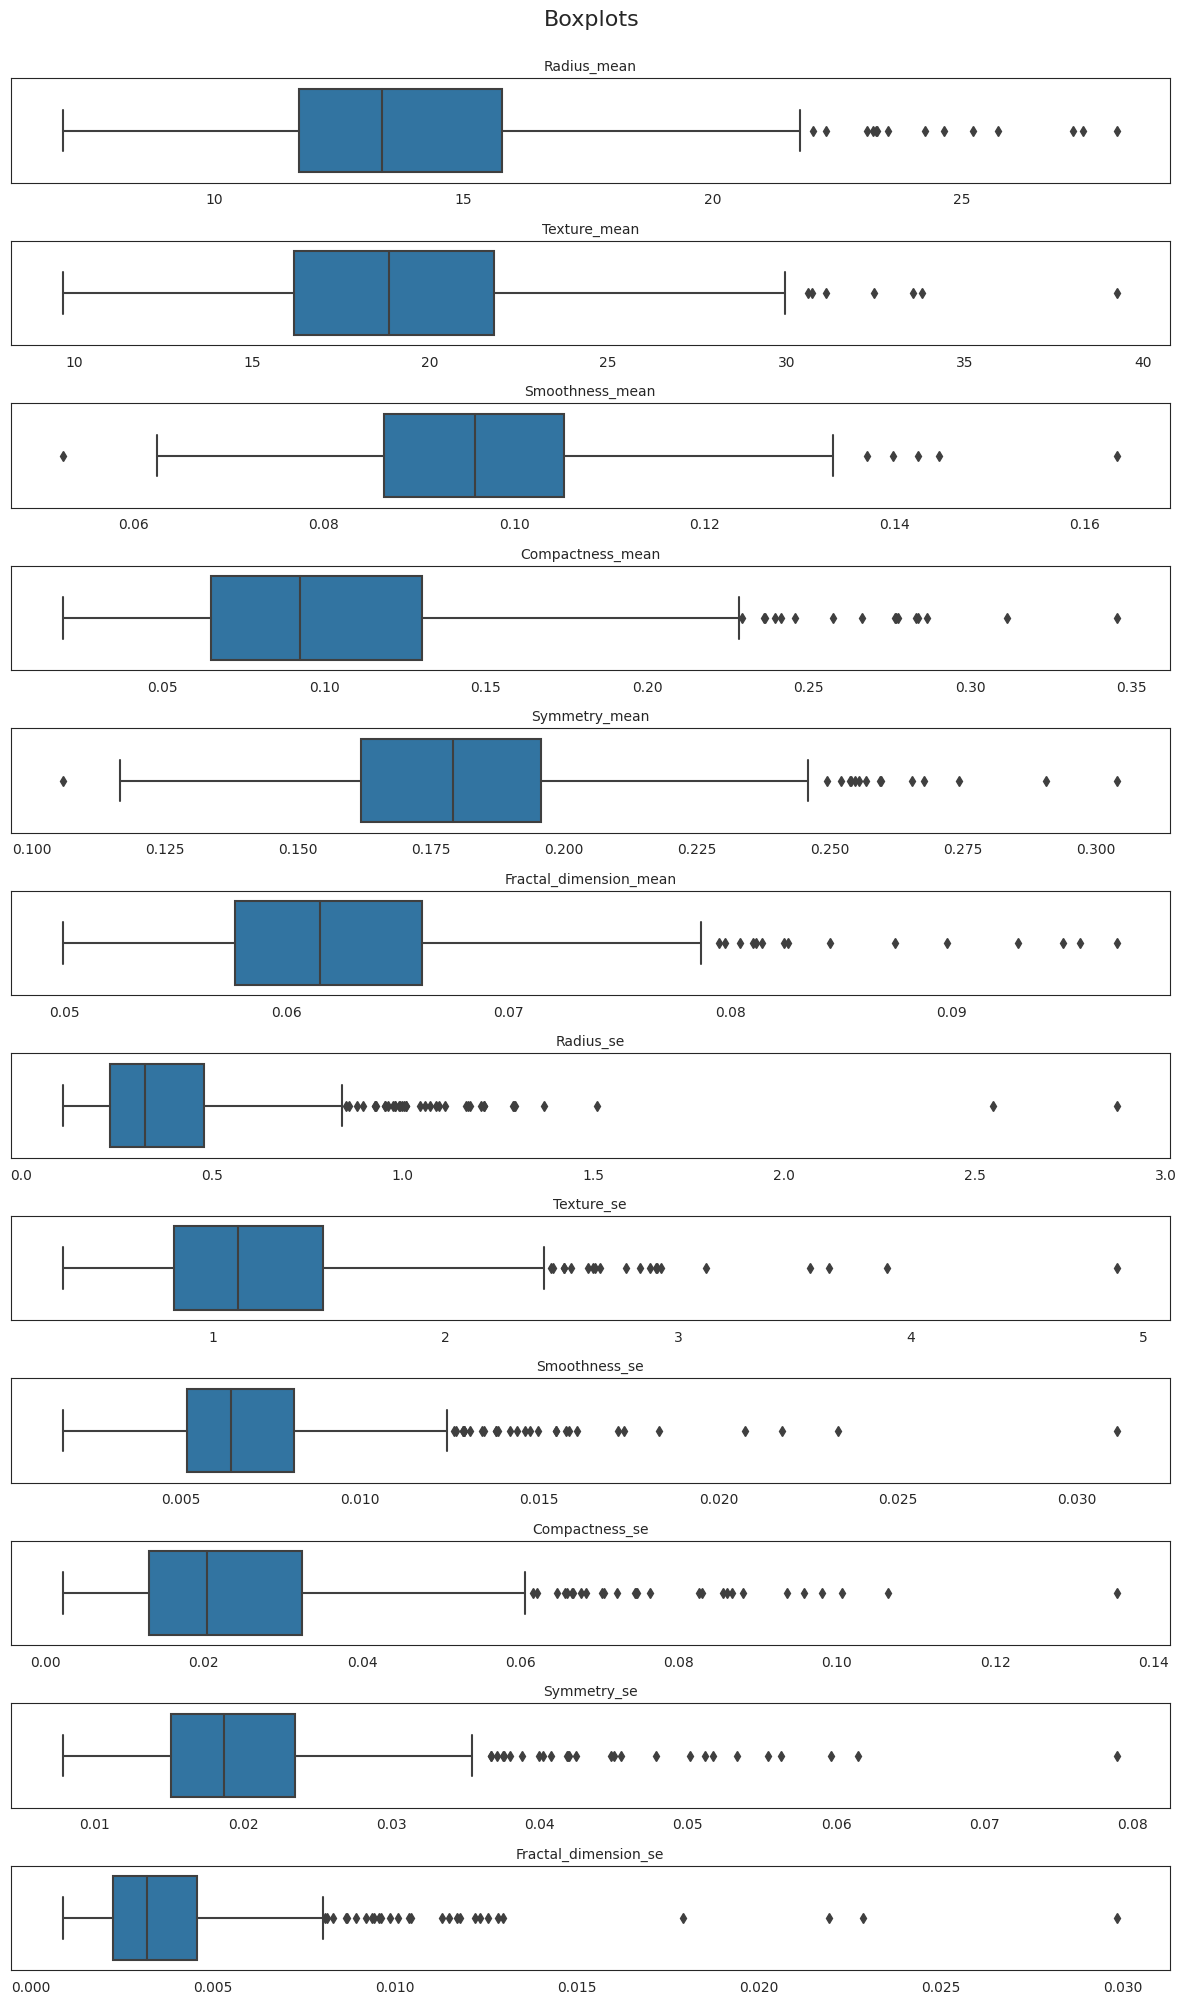

In [86]:
fig, axes = plt.subplots(figsize=(12,20))
fig.suptitle("Boxplots", fontsize=16, y=1)
col_cnt = 1
scale_cols = []
for colname in data_df.select_dtypes(include='number'):
  # Como el dataframe no tiene valores negativos el max() >= 1 satisface el
  # requerimiento 'Guarda en una variable (scale_cols) aquellas que no se
  # encuentren en el intervalo [0,1]'
  if (data_df[colname].max() > 1):
    scale_cols.append(colname)
  ax = plt.subplot(12,1, col_cnt)
  ax.set_title(colname.capitalize() , size=10)
  bp = sns.boxplot(data=data_df, x=colname)
  # Decluttering
  bp.set(xlabel=None, ylabel=None)
  col_cnt += 1
plt.tight_layout()

In [87]:
print("Variables que no se encuentran en el intervalo [0,1]")
print(scale_cols)

Variables que no se encuentran en el intervalo [0,1]
['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [88]:
data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)

In [89]:
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [90]:
X = data_df.iloc[:,1:]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se      

In [91]:
y = data_df.loc[:,'diagnosis']
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 569 entries, 842302 to 92751
Series name: diagnosis
Non-Null Count  Dtype 
--------------  ----- 
569 non-null    object
dtypes: object(1)
memory usage: 8.9+ KB


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [93]:
# La variable 'drop_cols' fue instanciada en 3d)
drop_columns = data_df.loc[:,data_df.columns.str.endswith('_worst')].columns.tolist() + drop_cols
# Lista de todas las columnas a borrar
drop_columns

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'area_mean',
 'area_se',
 'concavity_mean',
 'concave points_mean',
 'concavity_se',
 'concave points_se']

In [94]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([ ('drop_columns', 'drop', drop_columns)],
                                  remainder='passthrough')


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

logr_model = make_pipeline(preprocessing, LogisticRegression())
logr_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst',
                                                   'perimeter_mean',
                                                   'perimeter_se', 'area_mean',
                                                   'area_se', 'concavity_mean',
                                                   'concave points_mean',
                                                   'concavity_se',
                                                   'concave points_se'])])),
                ('logisticregression', LogisticRegression())])

In [96]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

def metrics_score(actual, predicted):
  cm = confusion_matrix(actual, predicted, labels=['B','M'])
  plt.figure(figsize=(8,5))
  sns.heatmap(cm, annot=True, fmt='.2f',
              xticklabels=['B','M'], yticklabels=['B','M'])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  print("")
  print('Recall: ', recall_score(actual, predicted, pos_label='M'))
  print('Precision: ', precision_score(actual, predicted, pos_label='M'))
  print('Accuracy: ', accuracy_score(actual, predicted))

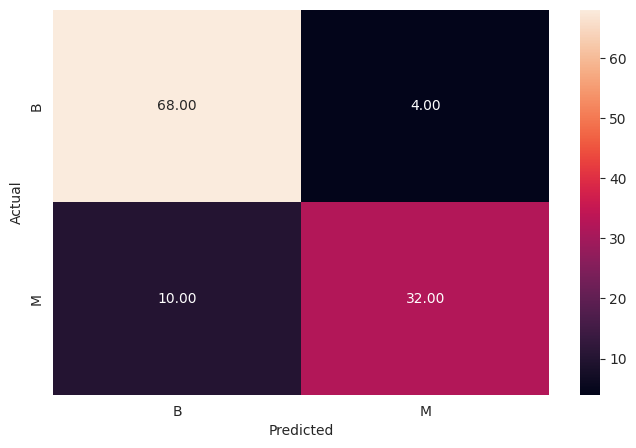


Recall:  0.7619047619047619
Precision:  0.8888888888888888
Accuracy:  0.8771929824561403


In [97]:
predictions = logr_model.predict(X_test)
metrics_score(y_test,predictions)

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [98]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
preprocessing = ColumnTransformer([
    ('drop_columns', 'drop', drop_columns),
    ('squared_root', FunctionTransformer(func=np.sqrt, validate=True), skew_cols),
    ('MinMax', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [99]:
logr_model2 = make_pipeline(preprocessing, LogisticRegression())
logr_model2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst',
                                                   'perimeter_mean',
                                                   'perimeter_se', 'area_mean',
                                                   'area...
                                                   'concave points_se']),
                                                 ('squared_root',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                      validate=True),
                                                  ['compactness_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['radius_mean',
                                                   'texture_mean', 'radius_se',
                                                   'texture_se'])])),
                ('logisticregression', LogisticRegression())])

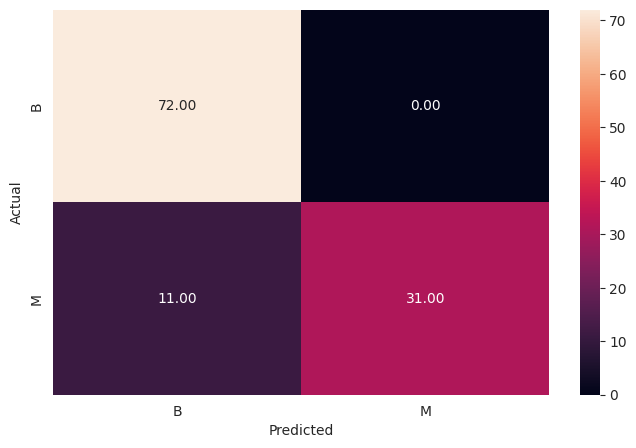


Recall:  0.7380952380952381
Precision:  1.0
Accuracy:  0.9035087719298246


In [100]:
predictions = logr_model2.predict(X_test)
metrics_score(y_test,predictions)

# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [101]:
from sklearn.preprocessing import StandardScaler
total_components = X.shape[1]
escalar = StandardScaler()
X_scaled = escalar.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [102]:
from sklearn.decomposition import PCA
pca = PCA()
X_projected = pca.fit_transform(X_scaled)
X_projected = pd.DataFrame(X_projected)
X_projected.head(5)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [103]:
# Numero de componentes que explican el 99% de la varianza
component_cnt = 0
cum_exp_var_ratio = 0
flag = 0
comp_99 = 0
for i in range(0, total_components):
  cur_exp_var_ratio = pca.explained_variance_ratio_[i]
  cum_exp_var_ratio += cur_exp_var_ratio
  if cum_exp_var_ratio > 0.99 and flag == 0:
    comp_99 = i
    flag = 1
    print("--------------------------------------------------------------------------------")
    print("Los componentes superiores (desde 1 hasta " + str(i)+ ") explican el 99% de la varianza")
    print("--------------------------------------------------------------------------------")
  print("La % de varianza de", i + 1, "explicada por PCA es", format(cur_exp_var_ratio * 100,'.2f'),'%')

La % de varianza de 1 explicada por PCA es 44.27 %
La % de varianza de 2 explicada por PCA es 18.97 %
La % de varianza de 3 explicada por PCA es 9.39 %
La % de varianza de 4 explicada por PCA es 6.60 %
La % de varianza de 5 explicada por PCA es 5.50 %
La % de varianza de 6 explicada por PCA es 4.02 %
La % de varianza de 7 explicada por PCA es 2.25 %
La % de varianza de 8 explicada por PCA es 1.59 %
La % de varianza de 9 explicada por PCA es 1.39 %
La % de varianza de 10 explicada por PCA es 1.17 %
La % de varianza de 11 explicada por PCA es 0.98 %
La % de varianza de 12 explicada por PCA es 0.87 %
La % de varianza de 13 explicada por PCA es 0.80 %
La % de varianza de 14 explicada por PCA es 0.52 %
La % de varianza de 15 explicada por PCA es 0.31 %
La % de varianza de 16 explicada por PCA es 0.27 %
--------------------------------------------------------------------------------
Los componentes superiores (desde 1 hasta 16) explican el 99% de la varianza
---------------------------------

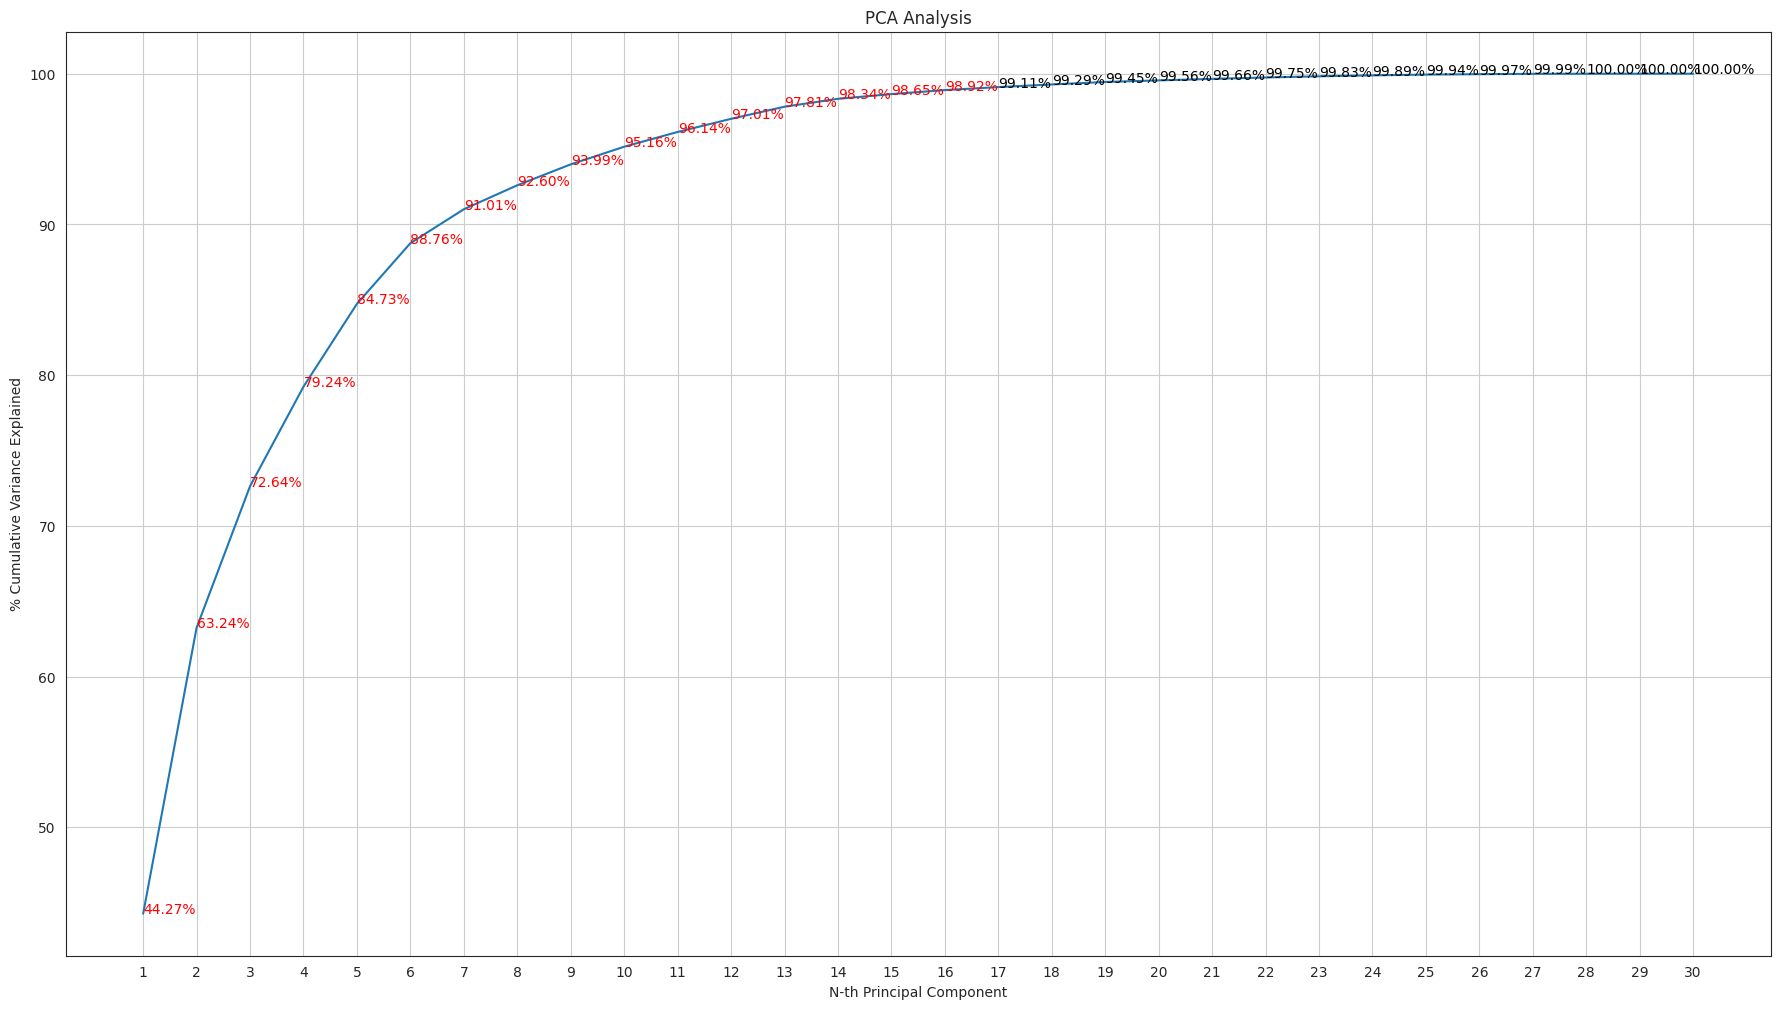

In [104]:
sns.set_style('white')
lcolor='red'
varianza_arr = pca.explained_variance_ratio_
plt.figure(figsize=(22,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(len(varianza_arr)), np.arange(1, len(varianza_arr)+1))
plt.grid()

labels = np.cumsum(varianza_arr)*100
for i in range(total_components):
  if i == comp_99:
    lcolor='black'
  plt.text(i,labels[i],str(format(labels[i],'.2f'))+'%', color=lcolor)

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [105]:
logr_model3 = make_pipeline(
    StandardScaler(),
    PCA(n_components=comp_99),
    LogisticRegression()
)

In [106]:
logr_model3.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=16)),
                ('logisticregression', LogisticRegression())])

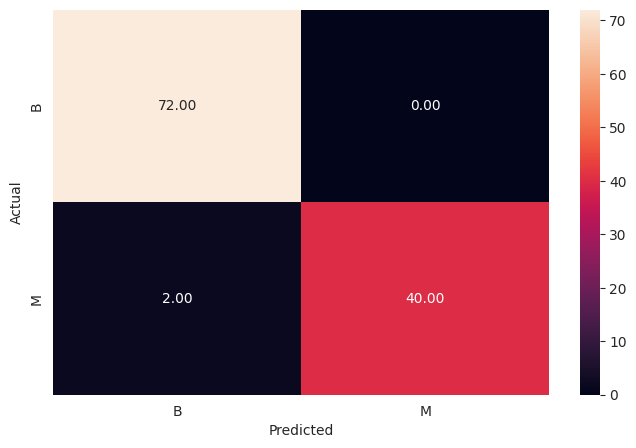


Recall:  0.9523809523809523
Precision:  1.0
Accuracy:  0.9824561403508771


In [107]:
predictions = logr_model3.predict(X_test)
metrics_score(y_test,predictions)

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

*En un modelo de diagnóstico médico, la métrica más crucial es el Recall o Sensibilidad, especialmente para minimizar los falsos positivos (FP). En el ámbito del diagnóstico médico, esta métrica es de suma importancia, ya que un bajo valor de Recall aumenta las probabilidades de que el modelo clasifique a una persona con cáncer como sana --una situación que podría tener consecuencias críticas para la vida o la muerte del paciente--.*

*Para optimizar el Recall, es fundamental reducir el Threshold, dado que el Recall guarda una relación inversamente proporcional con el Threshold. A medida que disminuye el Threshold, el Recall experimenta un incremento significativo, lo que contribuye a una detección más precisa de casos positivos.*